# City of Pittsburgh Crash Data 

To help answer the question of what is the most traversible neighborhood in Pittsburgh, we can look at the crash data in each neighborhood. Safety is a large factor in determining traversibility. The amount of people involced in accidents in certain areas can show which neighborhoods are safe to travel and which are not as safe. Then, you can look into what causes this. I do this by checking which incidents related to the road condition and which related to negligence by the drver.

Firstly, I'll read in the crash data set and the municipality codes.

In [53]:
import pandas as pd
from matplotlib import pyplot as plt

crash_data = pd.read_csv("https://tools.wprdc.org/downstream/2c13021f-74a9-4289-a1e5-fe0472c89881", dtype=str)
municipality_codes = pd.read_csv("https://data.wprdc.org/dataset/3130f583-9499-472b-bb5a-f63a6ff6059a/resource/fb81a55f-c560-4541-9ad4-7ea7c41f79e7/download/municipalitycodes.csv", index_col="Code")

crash_data.head()

,_id,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,1,2004000001,11,02,02454,02454,2004,01,5,0257,...,2,E,2,2032,35,0010,1000,LEWIS RUN RD,NaN,NaN
1,2,2004000010,11,02,02440,02440,2004,01,5,1027,...,2,W,3,NaN,35,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,3,2004000016,11,02,02203,02203,2004,01,5,1839,...,2,W,2,3082,35,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,4,2004000022,11,02,02404,02404,2004,01,6,0914,...,2,N,4,NaN,25,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,5,2004000030,11,02,02419,02419,2004,01,5,2230,...,2,S,4,NaN,20,NaN,NaN,THORNBERRY DR,NaN,NaN


In [54]:
municipality_codes.head()

,Municipality
Code,
2101,Baldwin Township
2102,Collier Township
2103,Crescent Township
2104,East Deer Township
2105,Elizabeth Township


## Cyclist and Pedestrian Crash Totals

In [55]:
ped_crashes = dict()

# iterates through every row of crash data
for i in range(len(crash_data)):
    
    # stores important values from each row
    ped_count = crash_data.loc[i, 'PEDESTRIAN']
    cyc_count = crash_data.loc[i, 'BICYCLE_COUNT']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if it doesn't already exist in the data set, add it with 0
    if neighborhood not in ped_crashes:
        ped_crashes[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(ped_count) > 0:
        ped_crashes[neighborhood] += 1
    if int(cyc_count) > 0:
        ped_crashes[neighborhood] += 1
            
new_ped_crashes = pd.Series(ped_crashes, name = "Pedestrian Involved Crashes")
sorted_ped_crashes = new_ped_crashes.sort_values()
sorted_ped_crashes.head(50)

02120    0
02457    0
02114    0
02491    0
02107    0
02417    0
02436    0
02482    0
02206    0
02465    0
02202    1
02470    1
02125    1
02452    1
02101    1
02471    1
02412    1
02450    1
02432    1
02406    1
02459    1
02455    1
02443    2
02211    2
02472    2
02103    2
02442    2
02121    2
02418    3
02490    3
02204    4
02434    4
02462    5
02215    5
02460    5
02409    5
02468    6
02405    6
02480    6
02411    6
02104    6
02479    7
02475    7
02469    7
02408    7
02410    7
02401    7
02478    7
02124    8
02428    8
Name: Pedestrian Involved Crashes, dtype: int64

Text(0.5, 0, 'Municipality')

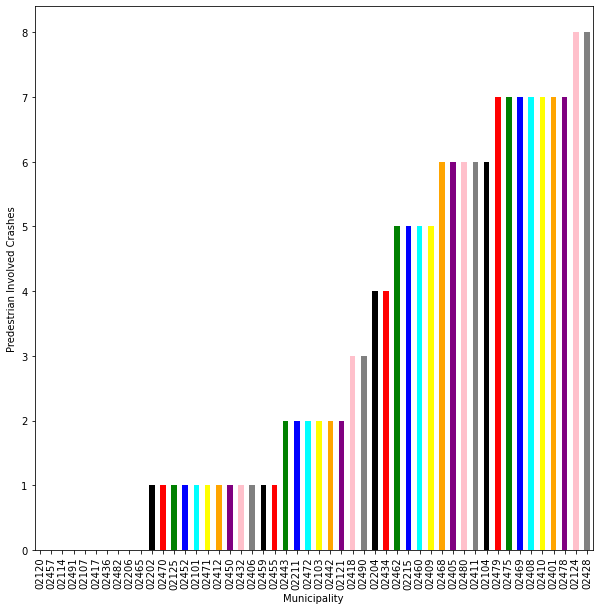

In [56]:
lowest_pedestrian_crashes = sorted_ped_crashes.head(50)

# vertical bar graph for the first 50 neighborhoods
plot1 = lowest_pedestrian_crashes.plot(kind='bar', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot1.set_ylabel("Predestrian Involved Crashes")
# x axis label
plot1.set_xlabel("Municipality")

10 Neighborhoods do not have any cyclist or pedestrian involved accidents. Therefore, I will use the traffic density in these neighborhoods to determine which has had the least incidents for the amount of daily traffic.
The neighborhoods with 0 incidents are: South Versailles Township, Rosslyn Farms Borough, Reserve Township, Trafford Borough, Leet Township, Chalfant Borough, Haysville Borough, Pennsbury Village, Harrison Township, and Thornburg Borough.

* South Versailles Township  - 339
* Rosslyn Farms Borough - 435
* Reserve Township - 3,234
* Trafford Borough - 3,280
* Leet Township - 1,580
* Chalfant Borough - 739
* Haysville Borough - 81 
* Pennsbury Village - 668
* Harrison Township - 10,292
* Thornburg Borough - 461

The top 3 are Harrison Township, Trafford Borough, and Reserve Township.

## Accidents as a Result of Unsafe Road Conditions

Now I will be adding up all of the accidents that result in unsafe road conditions. If a road has a higher amount of crashes that are caused by road conditions, it will be less safe for someone to travel on this road whether they are biking, walking, or driving. Therefore, this factor would make an area less traversable.

In [65]:
unsafe_roads = dict()

# iterates every row of crash_data
for i in range(len(crash_data)):
    
    # stores important data points for each row
    illumination = crash_data.loc[i, 'ILLUMINATION']
    curve = crash_data.loc[i, 'CURVED_ROAD']
    ice = crash_data.loc[i, 'SNOW_SLUSH_ROAD']
    wet_road = crash_data.loc[i, 'WET_ROAD']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if the neighborhood doesn't exist in the dictionary, add it wtih 0
    if neighborhood not in unsafe_roads:
        unsafe_roads[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(illumination) == 2:
        unsafe_roads[neighborhood] += 1
    if int(curve) > 0:
        unsafe_roads[neighborhood] += 1
    if int(ice) > 0:
        unsafe_roads[neighborhood] += 1    
    if int(wet_road) > 0:
        unsafe_roads[neighborhood] += 1
        
# creates a new series from the dictionary
new_unsafe_roads = pd.Series(unsafe_roads, name = "Unsafe Road Conditions")
sorted_unsafe_roads = new_unsafe_roads.sort_values()
sorted_unsafe_roads.head(10)

02491      1
02120      6
02482      6
02406      6
02410     12
02490     12
02417     14
02452     18
02465     18
02442     19
02468     20
02408     22
02101     26
02114     26
02450     26
02409     29
02471     33
02462     37
02470     37
02436     39
02453     39
02418     41
02107     49
02455     50
02412     53
02447     57
02456     57
02469     60
02475     61
02472     65
02437     68
02457     68
02405     74
02428     76
02103     77
02422     78
02211     81
02427     88
02458     88
02479     92
02439     95
02449     98
02425    108
02441    113
02110    115
02434    118
02429    128
02125    128
02467    136
02411    139
Name: Unsafe Road Conditions, dtype: int64

Text(0.5, 0, 'Municipality')

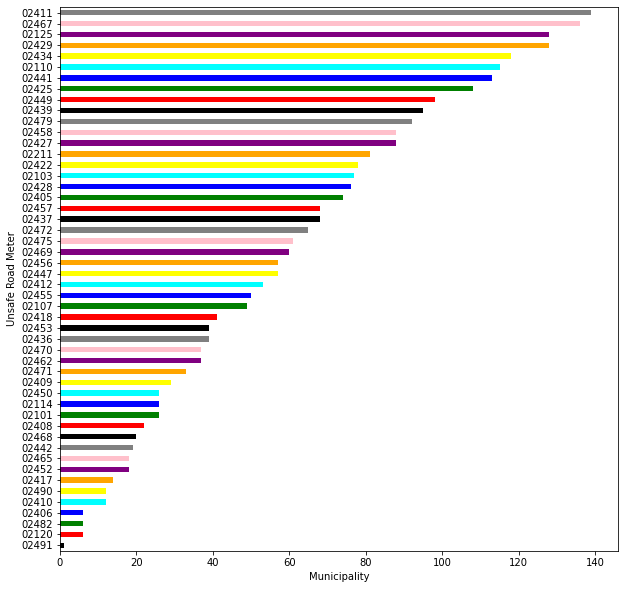

In [67]:
safest_roads = sorted_unsafe_roads.head(50)

# horizontal bar graph of the first 50 neighborhoods with unsafe road condition related incidents.
plot2 = safest_roads.plot(kind='barh', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot2.set_ylabel("Unsafe Road Meter")
# x axis label
plot2.set_xlabel("Municipality")

The top 3 neighborhoods with the least accidents resulting from road conditions are Trafford Borough, South Versailles Township, and Pennsbury Village. Harrison Township was also tied for third. 

## Neighborhood With the Most Hazardous Drivers

Looking at crashes that resulted from hazardous drivers can give insight to the safety traveling in that area. The data that can show this could be drunk driving, speeding, or cell phone use.

In [77]:
hazardous_drivers = dict()

# loops through every row of the crash data
for i in range(len(crash_data)):
    
    # stores values of data points for each row 
    alcohol = crash_data.loc[i, 'ALCOHOL_RELATED']
    phone = crash_data.loc[i, 'CELL_PHONE']
    red_light = crash_data.loc[i, 'RUNNING_RED_LT']
    tailgaiting = crash_data.loc[i, 'TAILGATING']
    speeding = crash_data.loc[i, 'SPEEDING_RELATED']
    agressive_driving = crash_data.loc[i, 'AGGRESSIVE_DRIVING']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if the neighborhood does not already exist in the dictionary, add it with 0
    if neighborhood not in hazardous_drivers:
        hazardous_drivers[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(alcohol) == 2:
        hazardous_drivers[neighborhood] += 1
    if int(phone) > 0:
        hazardous_drivers[neighborhood] += 1
    if int(red_light) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(tailgaiting) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(speeding) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(agressive_driving) > 0:
        hazardous_drivers[neighborhood] += 1
        
# make a new temp series from the dictionary to sort the values
new_hazardous_drivers = pd.Series(hazardous_drivers)
sorted_hazardous_drivers = new_hazardous_drivers.sort_values()
sorted_hazardous_drivers.head(10)

02120     2
02482     2
02406     3
02491     4
02490    19
02114    23
02107    23
02470    23
02442    24
02417    29
dtype: int64

Text(0.5, 0, 'Municipality')

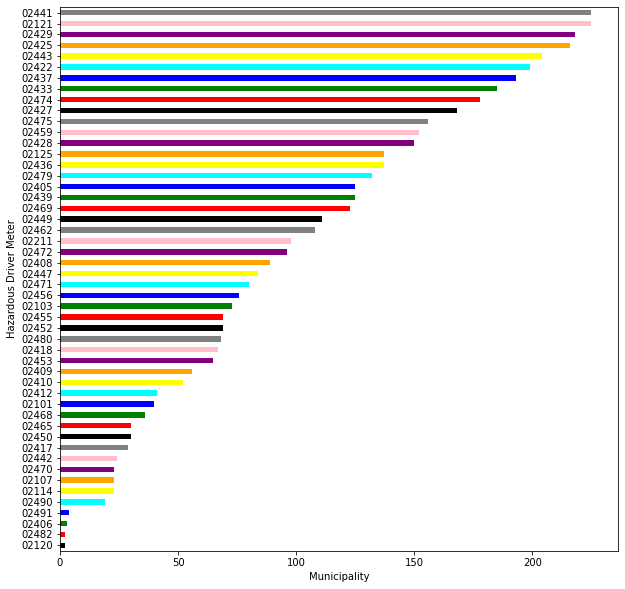

In [75]:
least_hazardous_drivers = sorted_hazardous_drivers.head(50)

# plot the first 50 neighborhoods from most hazardous driver incidents to least
plot3 = least_hazardous_drivers.plot(kind='barh', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot3.set_ylabel("Hazardous Driver Meter")
# x axis label
plot3.set_xlabel("Municipality")

The top 3 neighborhoods with the least hazardous drivers are South Versailles Township, Pennsbury Village, and Harrison Township.

# Conclusion

**Cyclist and Pedestrian Crash Totals**

* 1. Harrison Township - 3
* 2. Trafford Borough - 2
* 3. Reserve Township - 1

**Accidents as a Result of Unsafe Road Conditions**

* 1. Trafford Borough - 3
* 2. South Versailles Township - 2
* 3. Pennsbury Village - 1
* 3. Harrison Township - 1

**Neighborhood With the Most Hazardous Drivers**

* 1. South Versailles Township - 3
* 2. Pennsbury Village - 2
* 3. Harrison Township - 1

To determine which is the most traversable neighborhood based on this data, I will use a point system. I will give 3 points for 1st place, 2 for 2nd, and 1 for 3rd. In addition, I will give an additional point for the first metric because out of the 3 it is the most important and should be rated the most heavily.

* Harrison Township - 6
* South Versailles Township - 5
* Trafford Borough - 5
* Pennsbury Village - 3
* Reserve Township - 1

Based on this data set, the most traversable neighborhood in Pittsburgh is Harrison Township.